In [1]:
# Dependencies
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 

#Reading in Files
cdc_df = pd.read_csv("Resource/VSRR_Provisional_Drug_Overdose_Death_Counts_2015_2021.csv", thousands=',')
care_df = pd.read_csv("Resource/Medicare_Opioid_Prescribing_Data_2013_2019.csv", low_memory = False)
caid_df = pd.read_csv("Resource/Medicaid_Opioid_Prescribing_data_2013_2019.csv", low_memory = False)

In [2]:
# Filtering Medcaid dropping year 2013 & 2014 and filtering for all plan types
caid_year = caid_df.loc[(caid_df["Year"] != 2013) & (caid_df["Year"] != 2014)]
caid_clean = caid_year.loc[caid_year["Plan_Type"]=="All"]
# Reset the index values for the dataframe
caid_clean = caid_clean.reset_index(drop=True)
caid_clean


Year   Geo_Lvl  Geo_Cd       Geo_Desc Plan_Type  Tot_Opioid_Clms  \
0    2019  National     NaN       National       All       21978286.0   
1    2019     State     1.0        Alabama       All         224310.0   
2    2019     State     2.0         Alaska       All          65394.0   
3    2019     State     4.0        Arizona       All         595206.0   
4    2019     State     5.0       Arkansas       All         216081.0   
..    ...       ...     ...            ...       ...              ...   
255  2015     State    51.0       Virginia       All         583116.0   
256  2015     State    53.0     Washington       All        1136474.0   
257  2015     State    54.0  West Virginia       All         520370.0   
258  2015     State    55.0      Wisconsin       All         962286.0   
259  2015     State    56.0        Wyoming       All          39088.0   

        Tot_Clms  Opioid_Prscrbng_Rate  Opioid_Prscrbng_Rate_5Y_Chg  \
0    677248025.0                  3.25                        -3.22   
1      7230251.0                  3.10                        -3.23   
2      1434139.0                  4.56                        -3.33   
3     14923326.0                  3.99                        -5.14   
4      4999626.0                  4.32                        -3.12   
..           ...                   ...                          ...   
255   10186332.0                  5.72                          NaN   
256   14016747.0                  8.11                          NaN   
257    9293729.0                  5.60                          NaN   
258   11306189.0                  8.51                          NaN   
259     534212.0                  7.32                          NaN   

     Opioid_Prscrbng_Rate_1Y_Chg  LA_Tot_Opioid_Clms  LA_Opioid_Prscrbng_Rate  \
0                          -0.44           3108845.0                    14.15   
1                          -1.08             10308.0                     4.60   
2                          -1.20              8268.0                    12.64   
3                          -0.75             44311.0                     7.44   
4                          -0.88              8129.0                     3.76   
..                           ...                 ...                      ...   
255                        -0.62             42311.0                     7.26   
256                        -0.89            106143.0                     9.34   
257                        -1.30             25575.0                     4.91   
258                        -0.35            146248.0                    15.20   
259                        -0.48              3792.0                     9.70   

     LA_Opioid_Prscrbng_Rate_5Y_Chg  LA_Opioid_Prscrbng_Rate_1Y_Chg  
0                              6.67                            4.62  
1                              0.16                            0.48  
2                              0.88                           -0.71  
3                             -2.79                           -0.52  
4                             -0.34                           -1.05  
..                              ...                             ...  
255                             NaN                           -0.26  
256                             NaN                            0.18  
257                             NaN                            0.66  
258                             NaN                            1.04  
259                             NaN                           -0.49  

[260 rows x 14 columns]

In [3]:
# Changing column name to state for merging later
caid_clean = caid_clean.rename(columns={"Geo_Desc":"State"})

caid_clean

Year   Geo_Lvl  Geo_Cd          State Plan_Type  Tot_Opioid_Clms  \
0    2019  National     NaN       National       All       21978286.0   
1    2019     State     1.0        Alabama       All         224310.0   
2    2019     State     2.0         Alaska       All          65394.0   
3    2019     State     4.0        Arizona       All         595206.0   
4    2019     State     5.0       Arkansas       All         216081.0   
..    ...       ...     ...            ...       ...              ...   
255  2015     State    51.0       Virginia       All         583116.0   
256  2015     State    53.0     Washington       All        1136474.0   
257  2015     State    54.0  West Virginia       All         520370.0   
258  2015     State    55.0      Wisconsin       All         962286.0   
259  2015     State    56.0        Wyoming       All          39088.0   

        Tot_Clms  Opioid_Prscrbng_Rate  Opioid_Prscrbng_Rate_5Y_Chg  \
0    677248025.0                  3.25                        -3.22   
1      7230251.0                  3.10                        -3.23   
2      1434139.0                  4.56                        -3.33   
3     14923326.0                  3.99                        -5.14   
4      4999626.0                  4.32                        -3.12   
..           ...                   ...                          ...   
255   10186332.0                  5.72                          NaN   
256   14016747.0                  8.11                          NaN   
257    9293729.0                  5.60                          NaN   
258   11306189.0                  8.51                          NaN   
259     534212.0                  7.32                          NaN   

     Opioid_Prscrbng_Rate_1Y_Chg  LA_Tot_Opioid_Clms  LA_Opioid_Prscrbng_Rate  \
0                          -0.44           3108845.0                    14.15   
1                          -1.08             10308.0                     4.60   
2                          -1.20              8268.0                    12.64   
3                          -0.75             44311.0                     7.44   
4                          -0.88              8129.0                     3.76   
..                           ...                 ...                      ...   
255                        -0.62             42311.0                     7.26   
256                        -0.89            106143.0                     9.34   
257                        -1.30             25575.0                     4.91   
258                        -0.35            146248.0                    15.20   
259                        -0.48              3792.0                     9.70   

     LA_Opioid_Prscrbng_Rate_5Y_Chg  LA_Opioid_Prscrbng_Rate_1Y_Chg  
0                              6.67                            4.62  
1                              0.16                            0.48  
2                              0.88                           -0.71  
3                             -2.79                           -0.52  
4                             -0.34                           -1.05  
..                              ...                             ...  
255                             NaN                           -0.26  
256                             NaN                            0.18  
257                             NaN                            0.66  
258                             NaN                            1.04  
259                             NaN                           -0.49  

[260 rows x 14 columns]

In [4]:
# Filtering Medicaid Data by Breakout Type and Perscription Geographic Levels for National or State levels
care_year = care_df.loc[(care_df["Year"] != 2013) & (care_df["Year"] != 2014)]
care_clean = care_year.loc[(care_year["Breakout_Type"]=="Totals") &  (care_year["Prscrbr_Geo_Lvl"]=="National") | (care_year["Prscrbr_Geo_Lvl"]=="State")  &  (care_year["Breakout"]=="Overall") & (care_df["Prscrbr_Geo_Desc"] != 'American Samoa')& (care_df["Prscrbr_Geo_Desc"] != 'Guam') & (care_df["Prscrbr_Geo_Desc"] != 'American Samoa') & (care_df["Prscrbr_Geo_Desc"] != 'Northern Mariana Islands') & (care_df["Prscrbr_Geo_Desc"] != 'Puerto Rico') & (care_df["Prscrbr_Geo_Desc"] != 'Virgin Islands')]

# Reset the index values for the dataframe
care_clean = care_clean.reset_index(drop=True)
care_clean

Year Prscrbr_Geo_Lvl  Prscrbr_Geo_Cd Prscrbr_Geo_Desc  RUCA_Cd  \
0    2019        National             NaN         National      NaN   
1    2019           State             1.0          Alabama      NaN   
2    2019           State             2.0           Alaska      NaN   
3    2019           State             4.0          Arizona      NaN   
4    2019           State             5.0         Arkansas      NaN   
..    ...             ...             ...              ...      ...   
255  2015           State            51.0         Virginia      NaN   
256  2015           State            53.0       Washington      NaN   
257  2015           State            54.0    West Virginia      NaN   
258  2015           State            55.0        Wisconsin      NaN   
259  2015           State            56.0          Wyoming      NaN   

    Breakout_Type Breakout  Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
0          Totals  Overall     1239380.0             803549.0   
1          Totals  Overall       15575.0               9739.0   
2          Totals  Overall        2847.0               1935.0   
3          Totals  Overall       25876.0              16578.0   
4          Totals  Overall        9700.0               7258.0   
..            ...      ...           ...                  ...   
255        Totals  Overall       25319.0              19755.0   
256        Totals  Overall       25351.0              19532.0   
257        Totals  Overall        7064.0               5174.0   
258        Totals  Overall       20540.0              16177.0   
259        Totals  Overall        1760.0               1363.0   

     Tot_Opioid_Clms      Tot_Clms  Opioid_Prscrbng_Rate  \
0         66138200.0  1.501140e+09                  4.41   
1          1814583.0  2.800821e+07                  6.48   
2            80311.0  1.639104e+06                  4.90   
3          1359955.0  2.569376e+07                  5.29   
4           998319.0  1.789430e+07                  5.58   
..               ...           ...                   ...   
255        1720058.0  3.055526e+07                  5.63   
256        1658461.0  2.374570e+07                  6.98   
257         752812.0  1.288542e+07                  5.84   
258        1489660.0  2.539947e+07                  5.86   
259         107085.0  1.718579e+06                  6.23   

     Opioid_Prscrbng_Rate_5Y_Chg  Opioid_Prscrbng_Rate_1Y_Chg  \
0                          -1.32                        -0.27   
1                          -1.40                        -0.42   
2                          -2.01                        -0.90   
3                          -1.79                        -0.33   
4                          -1.08                        -0.32   
..                           ...                          ...   
255                          NaN                        -0.29   
256                          NaN                        -0.19   
257                          NaN                        -0.56   
258                          NaN                        -0.15   
259                          NaN                        -0.02   

     LA_Tot_Opioid_Clms  LA_Opioid_Prscrbng_Rate  \
0             7290510.0                    11.02   
1              138456.0                     7.63   
2               13005.0                    16.19   
3              184250.0                    13.55   
4               76135.0                     7.63   
..                  ...                      ...   
255            201649.0                    11.72   
256            281071.0                    16.95   
257             69188.0                     9.19   
258            263191.0                    17.67   
259             17067.0                    15.94   

     LA_Opioid_Prscrbng_Rate_5Y_Chg  LA_Opioid_Prscrbng_Rate_1Y_Chg  
0                             -1.73                           -0.77  
1                             -2.13                           -0.73  
2                             -3.7

In [5]:
# Changing column name to state for merging late
care_clean = care_clean.rename(columns={"Prscrbr_Geo_Desc":"State"})
care_clean

Year Prscrbr_Geo_Lvl  Prscrbr_Geo_Cd          State  RUCA_Cd  \
0    2019        National             NaN       National      NaN   
1    2019           State             1.0        Alabama      NaN   
2    2019           State             2.0         Alaska      NaN   
3    2019           State             4.0        Arizona      NaN   
4    2019           State             5.0       Arkansas      NaN   
..    ...             ...             ...            ...      ...   
255  2015           State            51.0       Virginia      NaN   
256  2015           State            53.0     Washington      NaN   
257  2015           State            54.0  West Virginia      NaN   
258  2015           State            55.0      Wisconsin      NaN   
259  2015           State            56.0        Wyoming      NaN   

    Breakout_Type Breakout  Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
0          Totals  Overall     1239380.0             803549.0   
1          Totals  Overall       15575.0               9739.0   
2          Totals  Overall        2847.0               1935.0   
3          Totals  Overall       25876.0              16578.0   
4          Totals  Overall        9700.0               7258.0   
..            ...      ...           ...                  ...   
255        Totals  Overall       25319.0              19755.0   
256        Totals  Overall       25351.0              19532.0   
257        Totals  Overall        7064.0               5174.0   
258        Totals  Overall       20540.0              16177.0   
259        Totals  Overall        1760.0               1363.0   

     Tot_Opioid_Clms      Tot_Clms  Opioid_Prscrbng_Rate  \
0         66138200.0  1.501140e+09                  4.41   
1          1814583.0  2.800821e+07                  6.48   
2            80311.0  1.639104e+06                  4.90   
3          1359955.0  2.569376e+07                  5.29   
4           998319.0  1.789430e+07                  5.58   
..               ...           ...                   ...   
255        1720058.0  3.055526e+07                  5.63   
256        1658461.0  2.374570e+07                  6.98   
257         752812.0  1.288542e+07                  5.84   
258        1489660.0  2.539947e+07                  5.86   
259         107085.0  1.718579e+06                  6.23   

     Opioid_Prscrbng_Rate_5Y_Chg  Opioid_Prscrbng_Rate_1Y_Chg  \
0                          -1.32                        -0.27   
1                          -1.40                        -0.42   
2                          -2.01                        -0.90   
3                          -1.79                        -0.33   
4                          -1.08                        -0.32   
..                           ...                          ...   
255                          NaN                        -0.29   
256                          NaN                        -0.19   
257                          NaN                        -0.56   
258                          NaN                        -0.15   
259                          NaN                        -0.02   

     LA_Tot_Opioid_Clms  LA_Opioid_Prscrbng_Rate  \
0             7290510.0                    11.02   
1              138456.0                     7.63   
2               13005.0                    16.19   
3              184250.0                    13.55   
4               76135.0                     7.63   
..                  ...                      ...   
255            201649.0                    11.72   
256            281071.0                    16.95   
257             69188.0                     9.19   
258            263191.0                    17.67   
259             17067.0                    15.94   

     LA_Opioid_Prscrbng_Rate_5Y_Chg  LA_Opioid_Prscrbng_Rate_1Y_Chg  
0                             -1.73                           -0.77  
1                             -2.13                           -0.73  
2                             -3.73                       

In [7]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC') & (cdc_df["State"] != 'DC') & (cdc_df["State"] != 'US')]
cdc_numofdeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Number of Deaths")]

# Reset the index values for the dataframes
cdc_numofdeathsindicator = cdc_numofdeathsindicator.reset_index(drop=True)
cdc_numofdeathsindicator

# Changing column names for merging later
cdc_numofdeathsindicator = cdc_numofdeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofdeathsindicator['Data Value'] = pd.to_numeric(cdc_numofdeathsindicator['Data Value'], errors = 'coerce')
cdcnumofdeathsaggregated=cdc_numofdeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})

cdcnumofdeathsaggregated


Data Value
                     sum
State ID Year           
AK       2015    50086.0
         2016    51141.0
         2017    51597.0
         2018    51865.0
         2019    53484.0
...                  ...
WY       2015    53812.0
         2016    52723.0
         2017    52181.0
         2018    54073.0
         2019    56144.0

[250 rows x 1 columns]

In [8]:
cdc_numofdeathsindicator

State ID  Year      Month           Period         Indicator  Data Value  \
0          AK  2015      April  12 month-ending  Number of Deaths      4133.0   
1          AK  2015     August  12 month-ending  Number of Deaths      4222.0   
2          AK  2015   December  12 month-ending  Number of Deaths      4193.0   
3          AK  2015   February  12 month-ending  Number of Deaths      4084.0   
4          AK  2015    January  12 month-ending  Number of Deaths      4034.0   
...       ...   ...        ...              ...               ...         ...   
2995       WY  2019      March  12 month-ending  Number of Deaths      4657.0   
2996       WY  2019        May  12 month-ending  Number of Deaths      4686.0   
2997       WY  2019   November  12 month-ending  Number of Deaths      4708.0   
2998       WY  2019    October  12 month-ending  Number of Deaths      4717.0   
2999       WY  2019  September  12 month-ending  Number of Deaths      4695.0   

     Percent Complete  Percent Pending Investigation    State  \
0                 100                       0.000000   Alaska   
1                 100                       0.000000   Alaska   
2                 100                       0.000000   Alaska   
3                 100                       0.000000   Alaska   
4                 100                       0.000000   Alaska   
...               ...                            ...      ...   
2995              100                       0.042946  Wyoming   
2996              100                       0.042680  Wyoming   
2997              100                       0.042481  Wyoming   
2998              100                       0.042400  Wyoming   
2999              100                       0.042599  Wyoming   

                                               Footnote Footnote Symbol  \
0     Numbers may differ from published reports usin...              **   
1     Numbers may differ from published reports usin...              **   
2     Numbers may differ from published reports usin...              **   
3     Numbers may differ from published reports usin...              **   
4     Numbers may differ from published reports usin...              **   
...                                                 ...             ...   
2995  Numbers may differ from published reports usin...              **   
2996  Numbers may differ from published reports usin...              **   
2997  Numbers may differ from published reports usin...              **   
2998  Numbers may differ from published reports usin...              **   
2999  Numbers may differ from published reports usin...              **   

      Predicted Value  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
2995              NaN  
2996              NaN  
2997              NaN  
2998              NaN  
2999              NaN  

[3000 rows x 12 columns]

In [9]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC') & (cdc_df["State"] != 'DC') & (cdc_df["State"] != 'US')]
cdc_numofdrugdeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Number of Drug Overdose Deaths")]

# Reset the index values for the dataframes
cdc_numofdrugdeathsindicator = cdc_numofdrugdeathsindicator.reset_index(drop=True)
cdc_numofdrugdeathsindicator

# Changing column names for merging later
cdc_numofdrugdeathsindicator = cdc_numofdrugdeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofdrugdeathsindicator['Data Value'] = pd.to_numeric(cdc_numofdrugdeathsindicator['Data Value'], errors = 'coerce')
cdc_numofdrugdeathsaggregated=cdc_numofdrugdeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})

cdc_numofdrugdeathsaggregated


Data Value
                     sum
State ID Year           
AK       2015     1472.0
         2016     1594.0
         2017     1571.0
         2018     1442.0
         2019     1544.0
...                  ...
WY       2015     1229.0
         2016     1138.0
         2017      871.0
         2018      763.0
         2019      797.0

[250 rows x 1 columns]

In [10]:
# Dropping years 2020 & 2021 and filtering indicator column 
cdc_year = cdc_df.loc[(cdc_df["Year"] != 2020) & (cdc_df["Year"] != 2021) & (cdc_df["State"] != 'YC') & (cdc_df["State"] != 'DC') & (cdc_df["State"] != 'US')]
cdc_numofopioiddeathsindicator = cdc_year.loc[(cdc_year["Indicator"]=="Opioids (T40.0-T40.4,T40.6)")]

# Reset the index values for the dataframes
cdc_numofopioiddeathsindicator = cdc_numofopioiddeathsindicator.reset_index(drop=True)
cdc_numofopioiddeathsindicator
                                                                             
                                                                             
# Changing column names for merging later
cdc_numofopioiddeathsindicator = cdc_numofopioiddeathsindicator.rename(columns={"State" : "State ID", "State Name" : "State"})
cdc_numofopioiddeathsindicator['Data Value'] = pd.to_numeric(cdc_numofopioiddeathsindicator['Data Value'], errors = 'coerce')
cdc_numofopioiddeathsaggregated=cdc_numofopioiddeathsindicator.groupby(['State ID', 'Year']).agg({'Data Value' : ['sum']})

cdc_numofopioiddeathsaggregated
                                                                             

Data Value
                     sum
State ID Year           
AK       2015      165.0
         2016     1163.0
         2017     1110.0
         2018      990.0
         2019      962.0
...                  ...
WY       2015        0.0
         2016        0.0
         2017      404.0
         2018      497.0
         2019      508.0

[215 rows x 1 columns]

In [11]:
# Merging Medicaid & Medicare data with an Outer Join
insurance = pd.merge(care_clean, caid_clean, how = "outer", on = ["Year", "State"], suffixes=("_Medicare", "_Medicaid"))
insurance

Year Prscrbr_Geo_Lvl  Prscrbr_Geo_Cd          State  RUCA_Cd  \
0    2019        National             NaN       National      NaN   
1    2019           State             1.0        Alabama      NaN   
2    2019           State             2.0         Alaska      NaN   
3    2019           State             4.0        Arizona      NaN   
4    2019           State             5.0       Arkansas      NaN   
..    ...             ...             ...            ...      ...   
255  2015           State            51.0       Virginia      NaN   
256  2015           State            53.0     Washington      NaN   
257  2015           State            54.0  West Virginia      NaN   
258  2015           State            55.0      Wisconsin      NaN   
259  2015           State            56.0        Wyoming      NaN   

    Breakout_Type Breakout  Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
0          Totals  Overall     1239380.0             803549.0   
1          Totals  Overall       15575.0               9739.0   
2          Totals  Overall        2847.0               1935.0   
3          Totals  Overall       25876.0              16578.0   
4          Totals  Overall        9700.0               7258.0   
..            ...      ...           ...                  ...   
255        Totals  Overall       25319.0              19755.0   
256        Totals  Overall       25351.0              19532.0   
257        Totals  Overall        7064.0               5174.0   
258        Totals  Overall       20540.0              16177.0   
259        Totals  Overall        1760.0               1363.0   

     Tot_Opioid_Clms_Medicare  ...  Plan_Type  Tot_Opioid_Clms_Medicaid  \
0                  66138200.0  ...        All                21978286.0   
1                   1814583.0  ...        All                  224310.0   
2                     80311.0  ...        All                   65394.0   
3                   1359955.0  ...        All                  595206.0   
4                    998319.0  ...        All                  216081.0   
..                        ...  ...        ...                       ...   
255                 1720058.0  ...        All                  583116.0   
256                 1658461.0  ...        All                 1136474.0   
257                  752812.0  ...        All                  520370.0   
258                 1489660.0  ...        All                  962286.0   
259                  107085.0  ...        All                   39088.0   

     Tot_Clms_Medicaid  Opioid_Prscrbng_Rate_Medicaid  \
0          677248025.0                           3.25   
1            7230251.0                           3.10   
2            1434139.0                           4.56   
3           14923326.0                           3.99   
4            4999626.0                           4.32   
..                 ...                            ...   
255         10186332.0                           5.72   
256         14016747.0                           8.11   
257          9293729.0                           5.60   
258         11306189.0                           8.51   
259           534212.0                           7.32   

     Opioid_Prscrbng_Rate_5Y_Chg_Medicaid  \
0                                   -3.22   
1                                   -3.23   
2                                   -3.33   
3                                   -5.14   
4                                   -3.12   
..                                    ...   
255                                   NaN   
256                                   NaN   
257                                   NaN   
258                                   NaN   
259                                   NaN   

     Opioid_Prscrbng_Rate_1Y_Chg_Medicaid  LA_Tot_Opioid_Clms_Medicaid  \
0                                   -0.44                    3108845.0   
1                                   -1.08                      10308.0   
2                                   -1.20     

In [12]:
# Merging CDC data & Insurace Data w/ an outer join and on Year and State
#data = pd.merge(cdcnumofdeathsaggregated, insurance, how = "outer", on = ["Year", "State"])
#data

In [13]:
# Scatterplot: State Death Rate versus Long Acting Opioids

# Getting the deathrate =  drug deaths / total deaths


In [14]:
drop = ["National", "District of Columbia"]

insurance2 = insurance.loc[insurance["State"].isin(drop)==False]
insurance2


Year Prscrbr_Geo_Lvl  Prscrbr_Geo_Cd          State  RUCA_Cd  \
1    2019           State             1.0        Alabama      NaN   
2    2019           State             2.0         Alaska      NaN   
3    2019           State             4.0        Arizona      NaN   
4    2019           State             5.0       Arkansas      NaN   
5    2019           State             6.0     California      NaN   
..    ...             ...             ...            ...      ...   
255  2015           State            51.0       Virginia      NaN   
256  2015           State            53.0     Washington      NaN   
257  2015           State            54.0  West Virginia      NaN   
258  2015           State            55.0      Wisconsin      NaN   
259  2015           State            56.0        Wyoming      NaN   

    Breakout_Type Breakout  Tot_Prscrbrs  Tot_Opioid_Prscrbrs  \
1          Totals  Overall       15575.0               9739.0   
2          Totals  Overall        2847.0               1935.0   
3          Totals  Overall       25876.0              16578.0   
4          Totals  Overall        9700.0               7258.0   
5          Totals  Overall      129325.0              80941.0   
..            ...      ...           ...                  ...   
255        Totals  Overall       25319.0              19755.0   
256        Totals  Overall       25351.0              19532.0   
257        Totals  Overall        7064.0               5174.0   
258        Totals  Overall       20540.0              16177.0   
259        Totals  Overall        1760.0               1363.0   

     Tot_Opioid_Clms_Medicare  ...  Plan_Type  Tot_Opioid_Clms_Medicaid  \
1                   1814583.0  ...        All                  224310.0   
2                     80311.0  ...        All                   65394.0   
3                   1359955.0  ...        All                  595206.0   
4                    998319.0  ...        All                  216081.0   
5                   5888034.0  ...        All                 2760295.0   
..                        ...  ...        ...                       ...   
255                 1720058.0  ...        All                  583116.0   
256                 1658461.0  ...        All                 1136474.0   
257                  752812.0  ...        All                  520370.0   
258                 1489660.0  ...        All                  962286.0   
259                  107085.0  ...        All                   39088.0   

     Tot_Clms_Medicaid  Opioid_Prscrbng_Rate_Medicaid  \
1            7230251.0                           3.10   
2            1434139.0                           4.56   
3           14923326.0                           3.99   
4            4999626.0                           4.32   
5           86344996.0                           3.20   
..                 ...                            ...   
255         10186332.0                           5.72   
256         14016747.0                           8.11   
257          9293729.0                           5.60   
258         11306189.0                           8.51   
259           534212.0                           7.32   

     Opioid_Prscrbng_Rate_5Y_Chg_Medicaid  \
1                                   -3.23   
2                                   -3.33   
3                                   -5.14   
4                                   -3.12   
5                                   -3.12   
..                                    ...   
255                                   NaN   
256                                   NaN   
257                                   NaN   
258                                   NaN   
259                                   NaN   

     Opioid_Prscrbng_Rate_1Y_Chg_Medicaid  LA_Tot_Opioid_Clms_Medicaid  \
1                                   -1.08                      10308.0   
2                                   -1.20                       8268.0   
3                                   -0.75     

The r-squared is: 0.0029963107423231256


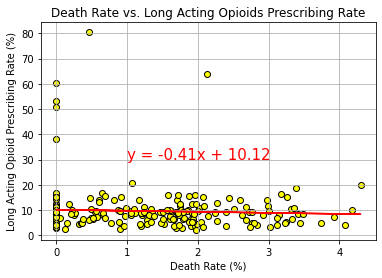

<Figure size 2160x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [70]:
# Calculating the Death Rate
death_rate = (cdc_numofopioiddeathsaggregated / cdcnumofdeathsaggregated) * 100

# Converting death_rate into a Series and filing Nan values with 0
death_rate = death_rate.squeeze()
death_rate = death_rate.fillna(0)

# Setting index to State & Year to match death_rate & location column of interest
insurance_styr = insurance2.set_index(["State", "Year"])
la_rate =insurance_styr["LA_Opioid_Prscrbng_Rate_Medicaid"]

# Find the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(death_rate, la_rate)

# Calculate linear regression
regress_values = death_rate * slope + intercept

# Plot data points and add a grid
plt.scatter(death_rate, la_rate , marker="o", facecolors="yellow", edgecolors="black")
plt.grid()

# Plot the line of best fit
plt.plot(death_rate, regress_values, "r-")

# Print y=mx+b onto plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (1,30),fontsize=15,color="red")

# Calculate & print the r-value
print(f"The r-squared is: {rvalue**2}")

# Add labels
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("Death Rate vs. Long Acting Opioids Prescribing Rate")

# Fig size, and show
plt.figure(figsize=(30, 25)) 
plt.show()

# Save fig
plt.savefig("graphs/deathrate_vs_longactingrate.png")

The r-squared is: 0.005933547474504864


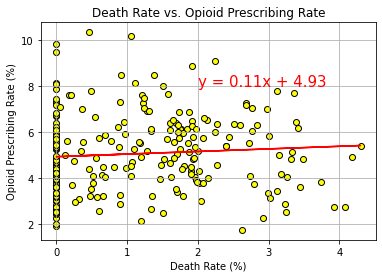

<Figure size 432x288 with 0 Axes>

In [71]:
# Calculating the Death Rate
death_rate = (cdc_numofopioiddeathsaggregated / cdcnumofdeathsaggregated) * 100

# Converting death_rate into a Series and filing Nan values with 0
death_rate = death_rate.squeeze()
death_rate = death_rate.fillna(0)

# Setting index to State & Year to match death_rate & location column of interest
insurance_styr = insurance2.set_index(["State", "Year"])
la_rate =insurance_styr["Opioid_Prscrbng_Rate_Medicaid"]

# Find the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(death_rate, la_rate)

# Calculate linear regression
regress_values = death_rate * slope + intercept

# Plot data points and add a grid
plt.scatter(death_rate, la_rate , marker="o", facecolors="yellow", edgecolors="black")
plt.grid()

# Plot the line of best fit
plt.plot(death_rate, regress_values, "r-")

# Print y=mx+b onto plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (2,8),fontsize=15,color="red")

# Calculate & print the r-value
print(f"The r-squared is: {rvalue**2}")

# Add labels
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("Death Rate vs. Opioid Prescribing Rate")

# Fig size, and show
plt.show()

# Save fig
plt.savefig("graphs/deathrate_vs_longactingrate.png")

In [79]:
# Finding the Long-Acting Opioid Perscribing Rate per Year and Summing those values 
fif_larate = insurance2[(insurance2["Year"]==2015)].groupby("State").sum()["LA_Opioid_Prscrbng_Rate_Medicaid"]
six_larate = insurance2[(insurance2["Year"]==2016)].groupby("State").sum()["LA_Opioid_Prscrbng_Rate_Medicaid"]
seven_larate = insurance2[(insurance2["Year"]==2017)].groupby("State").sum()["LA_Opioid_Prscrbng_Rate_Medicaid"]
eight_larate = insurance2[(insurance2["Year"]==2018)].groupby("State").sum()["LA_Opioid_Prscrbng_Rate_Medicaid"]
nine_larate = insurance2[(insurance2["Year"]==2019)].groupby("State").sum()["LA_Opioid_Prscrbng_Rate_Medicaid"]

In [48]:
# Finding the sum of the number of opiod deaths by year
fifteen = cdc_numofopioiddeathsindicator[(cdc_numofopioiddeathsindicator["Year"]==2015)].groupby("State ID").sum()["Data Value"]
sixteen = cdc_numofopioiddeathsindicator[(cdc_numofopioiddeathsindicator["Year"]==2016)].groupby("State ID").sum()["Data Value"]
seventeen = cdc_numofopioiddeathsindicator[(cdc_numofopioiddeathsindicator["Year"]==2017)].groupby("State ID").sum()["Data Value"]
eightteen = cdc_numofopioiddeathsindicator[(cdc_numofopioiddeathsindicator["Year"]==2018)].groupby("State ID").sum()["Data Value"]
nineteen = cdc_numofopioiddeathsindicator[(cdc_numofopioiddeathsindicator["Year"]==2019)].groupby("State ID").sum()["Data Value"]

# Finding the sum of the number of drug deaths by year
fif_td = cdc_numofdrugdeathsindicator[(cdc_numofdrugdeathsindicator["Year"]==2015)].groupby("State ID").sum()["Data Value"]
six_td = cdc_numofdrugdeathsindicator[(cdc_numofdrugdeathsindicator["Year"]==2016)].groupby("State ID").sum()["Data Value"]
seven_td = cdc_numofdrugdeathsindicator[(cdc_numofdrugdeathsindicator["Year"]==2017)].groupby("State ID").sum()["Data Value"]
eight_td = cdc_numofdrugdeathsindicator[(cdc_numofdrugdeathsindicator["Year"]==2018)].groupby("State ID").sum()["Data Value"]
nine_td = cdc_numofdrugdeathsindicator[(cdc_numofdrugdeathsindicator["Year"]==2018)].groupby("State ID").sum()["Data Value"]

# Finding the death rate per year
fif_deathrate = ((fifteen/fif_td)*100).fillna(0)
six_deathrate = ((sixteen/six_td)*100).fillna(0)
seven_deathrate = ((seventeen/seven_td)*100).fillna(0)
eight_deathrate = ((eightteen/eight_td)*100).fillna(0)
nine_deathrate = ((nineteen/nine_td)*100).fillna(0)


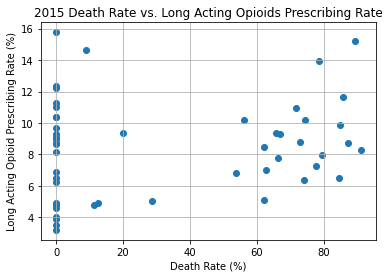

In [72]:
# Plotting 2015 Data
plt.scatter(fif_deathrate, fif_larate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("2015 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_longactingrate2015.png")

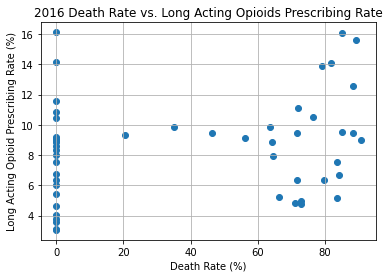

In [73]:
# Plotting 2016 Data
plt.scatter(six_deathrate, six_larate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("2016 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_longactingrate2016.png")

Text(0.5, 1.0, '2017 Death Rate vs. Long Acting Opioids Prescribing Rate')

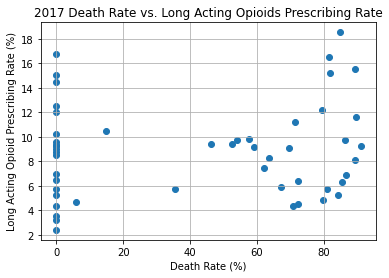

In [57]:
# Plotting 2017 Data
plt.scatter(seven_deathrate, seven_larate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("2017 Death Rate vs. Long Acting Opioids Prescribing Rate")

# plt.savefig("graphs/deathrateyear_vs_longactingrate2017.png")

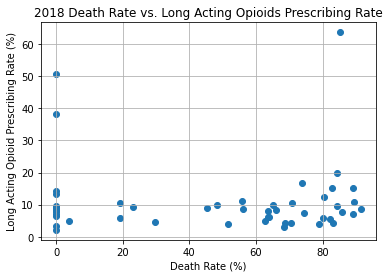

In [74]:
# Plotting 2018 Data
plt.scatter(eight_deathrate, eight_larate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("2018 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_longactingrate2018.png")

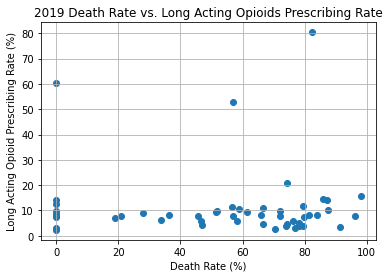

In [75]:
# PLotting 2019
plt.scatter(nine_deathrate, nine_larate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Long Acting Opioid Prescribing Rate (%)")
plt.title("2019 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_longactingrate2019.png")

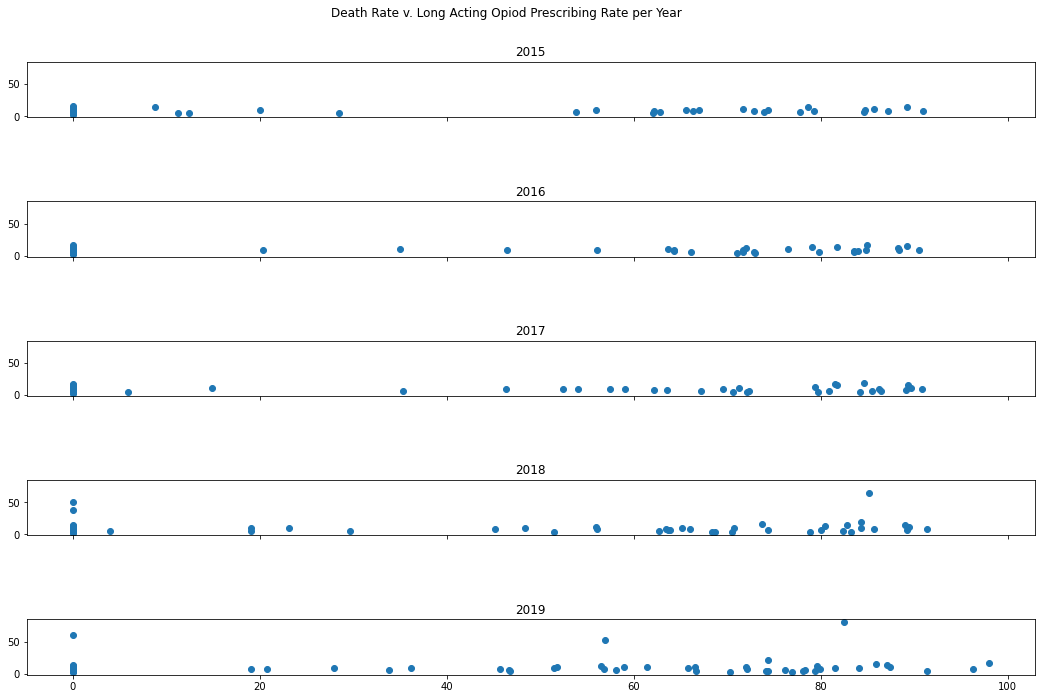

In [76]:
# Set up subplots to share and x&y axis
fig, axs = plt.subplots(5, sharex = True, sharey = True)
fig.suptitle("Death Rate v. Long Acting Opiod Prescribing Rate per Year")

# Plot each scatter plot 
axs[0].scatter(fif_deathrate, fif_larate)
axs[1].scatter(six_deathrate, six_larate)
axs[2].scatter(seven_deathrate, seven_larate)
axs[3].scatter(eight_deathrate, eight_larate)
axs[4].scatter(nine_deathrate, nine_larate)

# Add title to each subplot
axs[0].title.set_text('2015')
axs[1].title.set_text('2016')
axs[2].title.set_text('2017')
axs[3].title.set_text('2018')
axs[4].title.set_text('2019')

# Ajust figure size
fig.tight_layout()
fig.set_size_inches(15.5, 10.5)
plt.savefig("graphs/deathrateyear_vs_longactingrateallyears.png")

In [78]:
fif_oprate = insurance2[(insurance2["Year"]==2015)].groupby("State").sum()["Opioid_Prscrbng_Rate_Medicaid"]
six_oprate = insurance2[(insurance2["Year"]==2016)].groupby("State").sum()["Opioid_Prscrbng_Rate_Medicaid"]
seven_oprate = insurance2[(insurance2["Year"]==2017)].groupby("State").sum()["Opioid_Prscrbng_Rate_Medicaid"]
eight_oprate = insurance2[(insurance2["Year"]==2018)].groupby("State").sum()["Opioid_Prscrbng_Rate_Medicaid"]
nine_oprate = insurance2[(insurance2["Year"]==2019)].groupby("State").sum()["Opioid_Prscrbng_Rate_Medicaid"]

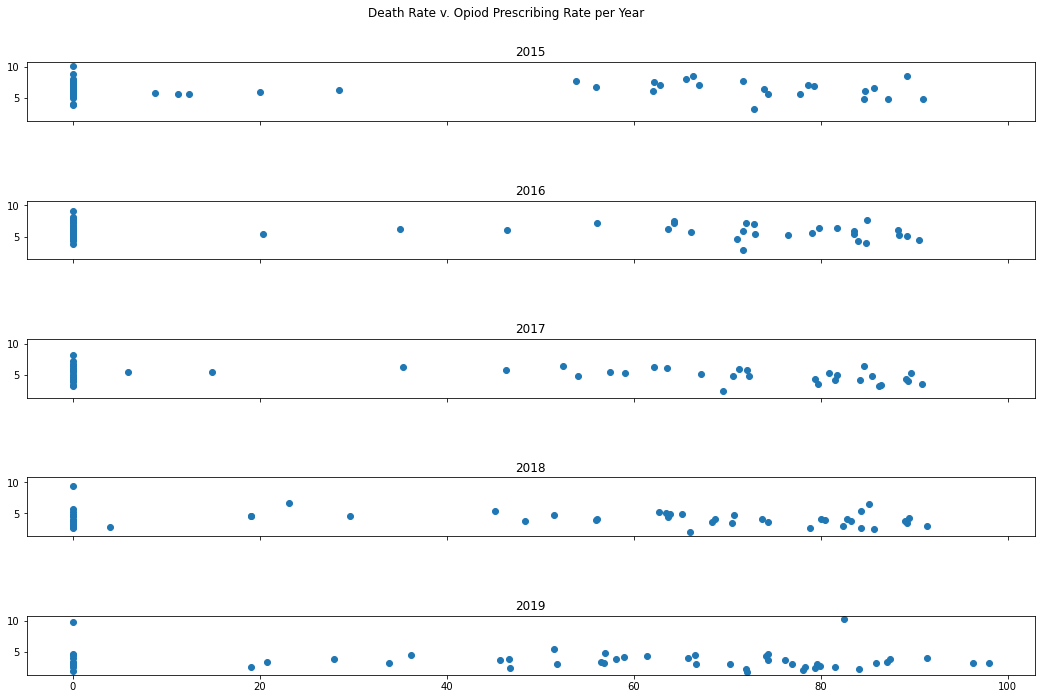

In [81]:
# Set up subplots to share and x&y axis
fig, axs = plt.subplots(5, sharex = True, sharey = True)
fig.suptitle("Death Rate v. Opiod Prescribing Rate per Year")

# Plot each scatter plot 
axs[0].scatter(fif_deathrate, fif_oprate)
axs[1].scatter(six_deathrate, six_oprate)
axs[2].scatter(seven_deathrate, seven_oprate)
axs[3].scatter(eight_deathrate, eight_oprate)
axs[4].scatter(nine_deathrate, nine_oprate)

# Add title to each subplot
axs[0].title.set_text('2015')
axs[1].title.set_text('2016')
axs[2].title.set_text('2017')
axs[3].title.set_text('2018')
axs[4].title.set_text('2019')

# Ajust figure size
fig.tight_layout()
fig.set_size_inches(15.5, 10.5)
plt.savefig("graphs/deathrateyear_vs_opioidrateallyears.png")

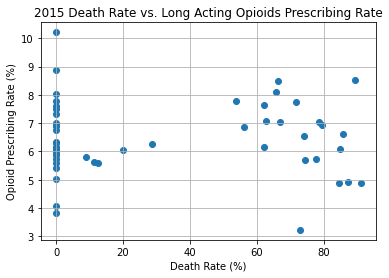

In [82]:
# Plotting 2015 Data
plt.scatter(fif_deathrate, fif_oprate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("2015 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_oprate2015.png")

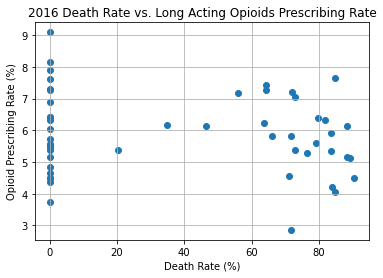

In [83]:
# Plotting 2016 Data
plt.scatter(six_deathrate, six_oprate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("2016 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_oprate2016.png")

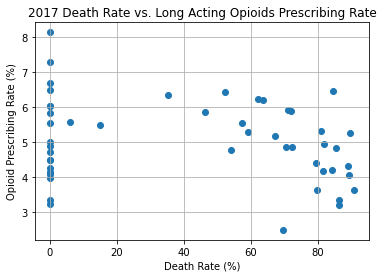

In [85]:
# Plotting 2017 Data
plt.scatter(seven_deathrate, seven_oprate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("2017 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_oprate2017.png")

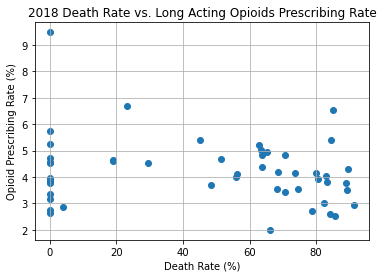

In [86]:
# Plotting 2018 Data
plt.scatter(eight_deathrate, eight_oprate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("2018 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_oprate2018.png")

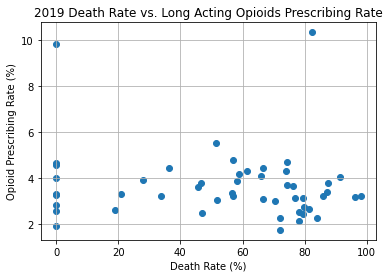

In [87]:
# Plotting 2019 Data
plt.scatter(nine_deathrate, nine_oprate)
plt.grid()

# Adding labels
fig.tight_layout()
plt.xlabel("Death Rate (%)")
plt.ylabel("Opioid Prescribing Rate (%)")
plt.title("2019 Death Rate vs. Long Acting Opioids Prescribing Rate")

plt.savefig("graphs/deathrateyear_vs_oprate2019.png")

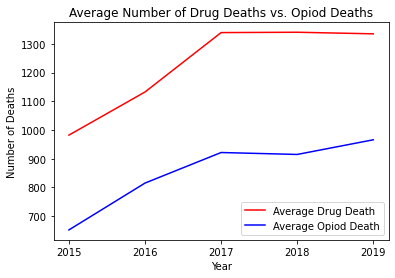

<Figure size 2160x1800 with 0 Axes>

In [53]:
# Calculating average number of drug deaths and average number of opioid deaths 
cdc_numofdrugdeathsmean=cdc_numofdrugdeathsindicator.groupby(['Year']).agg({'Data Value' : ['mean']})
cdc_numofopioiddeathsmean=cdc_numofopioiddeathsindicator.groupby(['Year']).agg({'Data Value' : ['mean']})

# One-Dimensional Array, convery into a Series
cdc_numofdrugdeathsmean = cdc_numofdrugdeathsmean.squeeze()
cdc_numofopioiddeathsmean = cdc_numofopioiddeathsmean.squeeze()

# Using years as key, for x-axis
years = cdc_numofdrugdeathsmean.keys()

# Plotting Average durg deaths for each year
drug_avg, = plt.plot(years, cdc_numofdrugdeathsmean, color="red", label = "Average Drug Death")

# Plotting Average opioid deaths for each year 
opioid_avg, = plt.plot(years,cdc_numofopioiddeathsmean, color = "blue", label = "Average Opiod Death")

# Adding labels
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Average Number of Drug Deaths vs. Opiod Deaths")
plt.xticks(years)

# Adding a legend
plt.legend(handles=[drug_avg, opioid_avg], loc = "best")
plt.figure(figsize=(30, 25)) 
plt.show()

# Saving fig
# plt.savefig("graphs/avgtotaldeath_vs_avgopioiddeath.png")